In [12]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pickle

import copy

import tensorflow.keras.backend as backend

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
import seaborn as sns

import os

# os.environ["CUDA_DEVICE_ORDER"] = "GPU"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14276600612563167993
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7589971140379816166
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8685517991516480679
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3761897472
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 4432352340264842841
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:83:00.0, compute capability: 6.1"
]


In [13]:
df = pickle.load( open( "/home/richard_stana/programing/clanok/data/picklnute/10min.p", "rb" ) )
df

,10m-item56,10m-item57,10m-item58,10m-item59,10m-item60,10m-item61,10m-item62,10m-item63,10m-item64,10m-item65,...,10m-item68,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item74,10m-item75,10m-item76,10m-item77
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,5,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52412,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52413,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52414,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
52415,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [14]:
casy = pd.read_csv("casy.csv")
df["Date Time"]=casy
df

,10m-item56,10m-item57,10m-item58,10m-item59,10m-item60,10m-item61,10m-item62,10m-item63,10m-item64,10m-item65,...,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item74,10m-item75,10m-item76,10m-item77,Date Time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:10:00
1,4,5,5,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:20:00
2,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:30:00
3,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:40:00
4,3,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,11.12.2017 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52412,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:30:00
52413,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:40:00
52414,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,09.12.2018 23:50:00
52415,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,10.12.2018 00:00:00


In [15]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


In [16]:
datetime_series = pd.to_datetime(date_time)
datetime_index = pd.DatetimeIndex(datetime_series.values)
df=df.set_index(datetime_index)
df

,10m-item56,10m-item57,10m-item58,10m-item59,10m-item60,10m-item61,10m-item62,10m-item63,10m-item64,10m-item65,...,10m-item68,10m-item69,10m-item70,10m-item71,10m-item72,10m-item73,10m-item74,10m-item75,10m-item76,10m-item77
2017-12-11 00:10:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11 00:20:00,4,5,5,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11 00:30:00,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11 00:40:00,5,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-11 00:50:00,3,4,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09 23:30:00,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-09 23:40:00,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-09 23:50:00,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-12-10 00:00:00,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [17]:
df = df.drop(["10m-item56", "10m-item57", "10m-item58", "10m-item60", "10m-item63", "10m-item64", "10m-item74"], axis=1)

In [18]:
train_df = df[76:44000]
val_df = df[44001:46655]
test_df = df[46800:52389]

In [19]:
actual_item = '10m-item76'

In [20]:
train_df[actual_item]

2017-12-11 12:50:00     60
2017-12-11 13:00:00     55
2017-12-11 13:10:00     58
2017-12-11 13:20:00     70
2017-12-11 13:30:00     71
                      ... 
2018-10-12 12:40:00    237
2018-10-12 12:50:00    222
2018-10-12 13:00:00    221
2018-10-12 13:10:00    226
2018-10-12 13:20:00    208
Name: 10m-item76, Length: 43924, dtype: int64

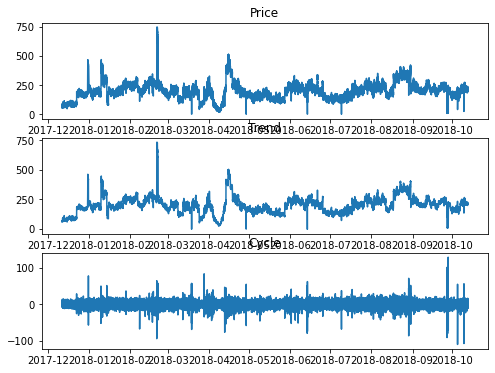

In [21]:
series = train_df[actual_item]

cycle, trend = sm.tsa.filters.hpfilter(series, 1600/4**4)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

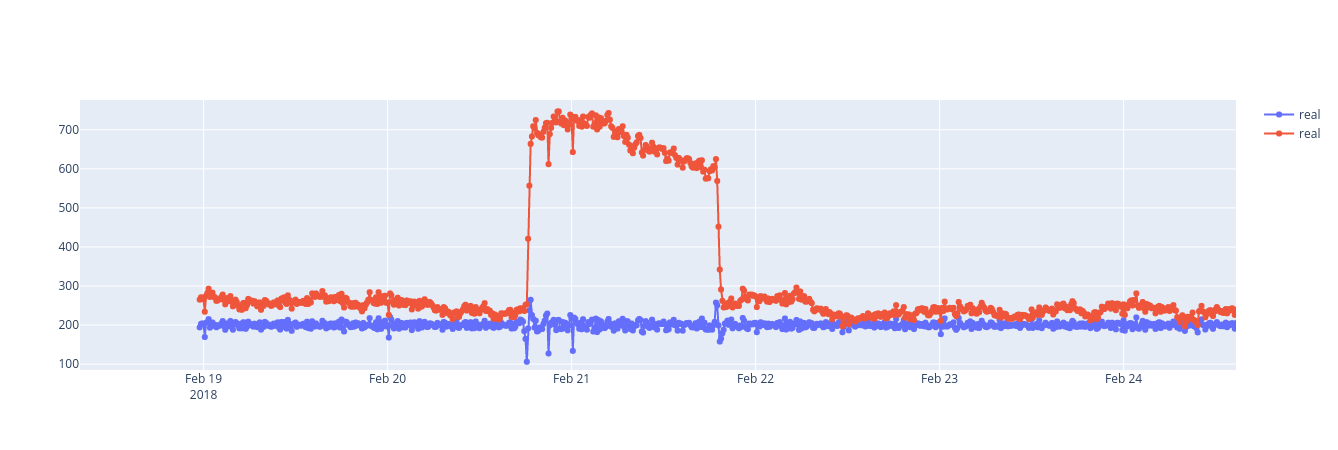

In [128]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=series.index[10000:20000], y=cycle[10000:20000]+200,
                    mode='lines+markers',
                    name='real'))
fig.add_trace(go.Scatter(x=series.index[10000:20000], y=series[10000:20000],
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df[actual_item]
result = seasonal_decompose(series[int(len(series)/2):int(len(series)/2)+int(len(series)/4)], model='additive', period=7*144)

result.plot()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal,
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df[actual_item].index[10000:20000], y=train_df[actual_item][10000:20000],
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df[actual_item]+1
result = seasonal_decompose(series, model='multiplicative', period=144)

result.plot()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.seasonal.index[10000:20000], y=result.seasonal[10000:20000],
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df[actual_item]+1
result = seasonal_decompose(series, model='additive', period=144)

result.plot()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.seasonal.index[10000:20000], y=result.seasonal[10000:20000],
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
dfp = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", header=0, index_col=0)
dfp

In [ ]:
result = seasonal_decompose(dfp, model='multiplicative', period=12)
result.plot()
pyplot.show()

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal,
                    mode='lines+markers',
                    name='real'))

fig.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import matplotlib.pyplot as plt
import seaborn as sns
# include below line if you are using Jupyter Notebook
%matplotlib inline
# Set figure width to 12 and height to 9
plt.rcParams['figure.figsize'] = [12, 9]
df = pd.read_csv('EURUSD.csv',sep='\t', index_col='Date')
df


In [ ]:
df.index = pd.to_datetime(df.index)
df


In [ ]:
df.sort_index(inplace=True)
df.head(20)


In [ ]:
df = df.resample('W').last()
df


In [ ]:
series = df['Price']
series

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Price')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

In [ ]:

result = seasonal_decompose(series, model='additive')

result.plot()
plt.show()